## Multidimensional Input Neural Net

In [6]:
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.colors as ListedColormap
%matplotlib inline

In [7]:
def plot_decision_regression(model, ds): # With 2D input class
    cmap_light = matplotlib.colors(['#FFAAAA', '#AAFFAA', '#00AAFF'])
    cmap_bold = matplotlib.colors(['#FF0000', '#00FF00', '#00AAFF'])
    X = ds.x.numpy()
    Y = ds.y.numpy()
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    x_mesh, y_mesh = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    mesh_tensor = torch.tensor(np.c_[x_mesh.ravel(), y_mesh.ravel()])
    
    y_hat = np.logical_not((model(mesh_tensor)[:, 0] > 0.5).numpy()).reshape(x_mesh.shape)
    plt.pcolormesh(x_mesh, y_mesh, y_hat, cmap=cmap_light)
    plt.plot(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], 'o', label='y = 0')
    plt.plot(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], 'ro', label='y = 1')
    plt.title('decision region')
    plt.legend()

In [21]:
def accuracy(model_, data_set):
    return np.mean(data_set.y.view(-1).numpy() == (model_(data_set.x)[:, 0] > 0.5).numpy())

In [9]:
class Net(nn.Module):
    def __init__(self, dim_in, dim_H, dim_out):
        super(Net, self).__init__()
        self.Seq1 = nn.Sequential(nn.Linear(dim_in, dim_H), nn.Sigmoid())
        self.Seq2 = nn.Sequential(nn.Linear(dim_H, dim_out), nn.Sigmoid())
    
    def forward(self, x):
        x = self.Seq1(x)
        x = self.Seq2(x)
        return x

In [22]:
def train_model(ds, model_, criterion_, train_oader, optimizer_, loss_arr, epochs=5):
    COST = []
    ACC = []
    for epoch in range(epochs):
        epoch_cost = 0
        for x, y in trainloader:
            optimizer_.zero_grad()
            yhat = model_(x)
            loss = criterion_(yhat, y)
            optimizer_.zero_grad()
            loss.backward()
            optimizer_.step()
            #cumulative loss 
            epoch_cost += loss.item()
        ACC.append(accuracy(model_, ds))
        COST.append(epoch_cost)
        loss_arr.append(epoch_cost)
        
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(COST, color=color)
    ax1.set_xlabel('Epoch', color=color)
    ax1.set_ylabel('Cost', color=color)
    ax1.tick_params(axis='y', color=color)
    
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.plot(ACC, color=color)
    ax2.set_ylabel('Accuracy', color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()
    plt.show()

In [11]:
class Data(Dataset): # Dataset from course (not generated by me)
    def __init__(self, data_size=100):
        self.x = torch.zeros((data_size, 2))
        self.y = torch.zeros((data_size, 1))
        self.len = data_size
        for i in range(data_size // 4):
            self.x[i, :] = torch.tensor([0.0, 0.0])
            self.y[i, 0] = torch.tensor([0.0])
            
            self.x[i + data_size // 4, :] = torch.tensor([0.0, 1.0])
            self.x[i + data_size // 4, 0] = torch.tensor([1.0])
            
            self.x[i + data_size // 2, :] = torch.tensor([1.0, 0.0])
            self.y[i + data_size // 2, 0] = torch.tensor([1.0])
            
            self.x[i + 3 * data_size // 4, :] = torch.tensor([1.0, 1.0])
            self.y[i + 3 * data_size // 4, 0] = torch.tensor([0.0])
            self.x = self.x + 0.1 * torch.randn((data_size, 2))
            
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len
    
    def plot_data(self):
        plt.plot(self.x[self.y[:, 0] == 0, 0].numpy(), self.x[self.y[:, 0] == 0, 1].numpy(), 'o', label='y = 0')
        plt.plot(self.x[self.y[:, 0] == 1, 0].numpy(), self.x[self.y[:, 0] == 1, 1].numpy(), 'ro', label='y = 1')
        plt.legend()
        plt.show()

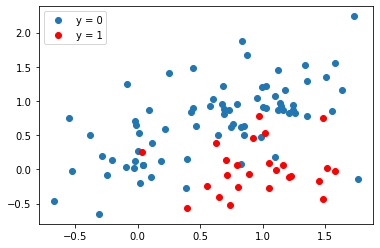

In [12]:
ds = Data()
ds.plot_data()

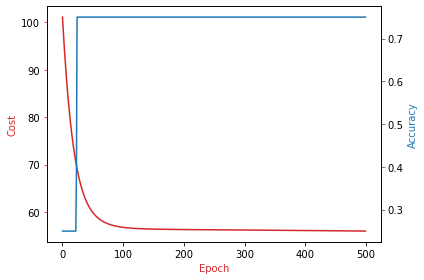

In [23]:
# Model with 1 neurons in hidden layer
# [WARNING] Do not train models with batch size 1 and 500 epochs for complex Deep learning tasks
model = Net(2, 1, 1)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
trainloader = DataLoader(dataset=ds, batch_size=1)
LOSS1 = []
train_model(ds, model, criterion, trainloader, optimizer, LOSS1, epochs=500) # 500 because 5 / 0.001 = 0.1 (the traditional lr)

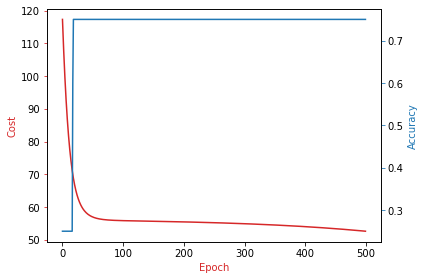

In [24]:
# Model with 2 neurons in hidden layer 
model2 = Net(2, 2, 1)
criterion2 = nn.BCELoss()
optimizer2 = optim.SGD(model2.parameters(), lr=0.001)
LOSS2 = []
train_model(ds, model2, criterion2, trainloader, optimizer2, LOSS2, epochs=500)

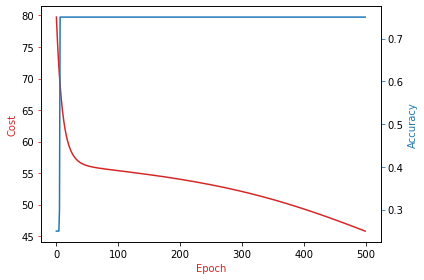

In [25]:
# Model with 4 neurons in hidden layer
model4 = Net(2, 4, 1)
criterion4 = nn.BCELoss()
optimizer4 = optim.SGD(model4.parameters(), lr=0.001)
LOSS4 = []
train_model(ds, model4, criterion4, trainloader, optimizer4, LOSS4, epochs=500)